## This notebook comprises my initial EDA and cleaning of my dataset (obtained here: https://www.kaggle.com/ehallmar/beers-breweries-and-beer-reviews)

In [44]:
# Import EDA packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
beers = pd.read_csv('beers-breweries-and-beer-reviews/beers.csv')
breweries = pd.read_csv('beers-breweries-and-beer-reviews/breweries.csv')
reviews = pd.read_csv('beers-breweries-and-beer-reviews/reviews.csv')

### Exploring the reviews

In [12]:
reviews.shape

(9073128, 10)

In [13]:
reviews.columns

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score'],
      dtype='object')

In [30]:
reviews.username.value_counts()

Sammy            13798
kylehay2004      12221
acurtis          12016
StonedTrippin    11859
jaydoc           11800
                 ...  
ezerhoden14          1
hubbitron            1
Kec                  1
Bozorgmehr           1
pekenne              1
Name: username, Length: 164934, dtype: int64

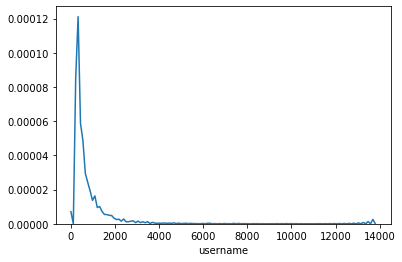

In [11]:
# visualize the number of reviews per use for all users
sns.distplot(reviews.username.value_counts(),hist=False)

The above plot is expected, most users have made a smaller number of reviews. The number of users with a lot of reviews is very small. Out of 165k reviewers, there are ~1820 that have more than 1000 reviews.

In [21]:
reviews.username.value_counts()[1820:]

jwinship83         1000
jooler             1000
falloutsnow        1000
Stum-pub           1000
Aaron_Kerkvliet     998
                   ... 
pprotz00              1
Aharts                1
Mark_Erden            1
Erich_Langner         1
stixfix               1
Name: username, Length: 163114, dtype: int64

In [31]:
reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [7]:
reviews.beer_id.value_counts()

11757     17160
2093      15947
7971      14927
1093      14915
29619     14292
          ...  
203777        1
126326        1
109950        1
282050        1
8188          1
Name: beer_id, Length: 309542, dtype: int64

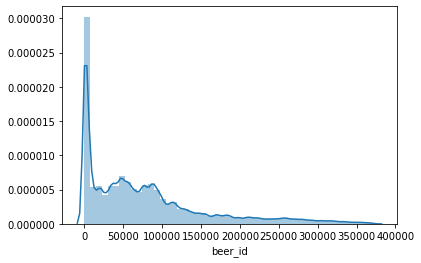

In [44]:
sns.distplot(reviews.beer_id)

The above shows a not so typical long tail associated with recommender systems. That is there is a small number of items that are very popular or are reviewed by many, and then this trails off and most items are not seen by most users. The above graph shows this general trend.

In [23]:
# looking at the text reviews series
reviews['text']

0             750 ml bottle, 2016 vintage, bottle #304 of...
1                                                           
2                                                           
3             0% 16 oz can. Funny story: As I finally wal...
4             Classic TH NEIPA. Overflowing head and bouq...
                                 ...                        
9073123                                                     
9073124                                                     
9073125                                                     
9073126                                                     
9073127                                                     
Name: text, Length: 9073128, dtype: object

In [24]:
# The blank spaces actually have a unicode character, let's get rid of it
reviews.iloc[2].text

'\xa0\xa0'

In [25]:
# Replace it with a blank string
reviews['text'] = reviews['text'].replace(u'\xa0\xa0', '')
# Confirming this is successful
reviews.iloc[2].text

''

In [31]:
# Loks like there are 6 million reviews with no text, that's too bad.
reviews.loc[reviews['text'] == '']

,beer_id,username,date,text,look,smell,taste,feel,overall,score
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
5,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91
6,125646,yummybeer,2017-12-19,,4.75,4.50,4.75,4.75,4.75,4.69
8,125646,wwoj,2017-12-16,,5.00,4.75,4.50,4.50,4.50,4.59
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


## Will most likely use the below subset only reviews that have text

In [26]:
reviews.loc[reviews['text'] != '']

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
13,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53
...,...,...,...,...,...,...,...,...,...,...
9073095,58482,smcolw,2009-08-22,Large chalky white head. Leaves lots of spo...,4.00,3.50,3.50,4.00,3.50,3.58
9073096,58482,firkinhophead,2009-08-21,"pours a hazy, almost cloudy, autumn gold. A...",3.50,4.00,4.00,3.50,4.00,3.92
9073097,58482,CHADMC3,2009-08-21,Pours a hazy golden/orange to copper with a...,4.00,4.00,3.50,4.00,4.00,3.80
9073110,104824,zookerman182,2014-06-24,Appearance is dark dark brown with a half f...,4.25,4.75,4.25,4.00,4.25,4.35


In [27]:
# Subsetting the reviews df to entries that only have text reviews
text_reviews = reviews.loc[reviews['text'] != '']

In [33]:
text_reviews.text.value_counts()

   0%                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [40]:
text_reviews.loc[text_reviews['text'] == '0%']

,beer_id,username,date,text,look,smell,taste,feel,overall,score


In [13]:
text_reviews.smell.isna().sum()

164241

In [28]:
# Confirming that the entries with NaN smell/taste/feel/overall score are the same reviews
(text_reviews[text_reviews.smell.isna() == True].index == text_reviews[text_reviews.overall.isna() == True].index).sum()

164241

### 164k of the text_reviews subset has NaN attribute ratings, whole dataset has 3.8 million. Makes sense as those that fill out a text review are likely to fill out the numerical ratings

In [29]:
# subset data to exclude NaN's as well
text_no_nan = text_reviews.loc[text_reviews.smell.isna() == False]

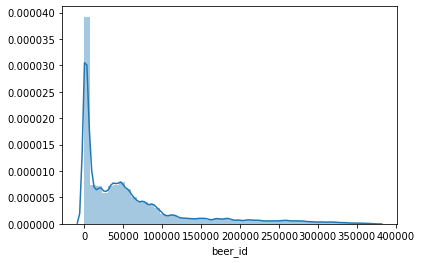

In [46]:
# reconfirming distrubtion of # of reviews per beer, still looks to be as expected
sns.distplot(text_no_nan.beer_id)

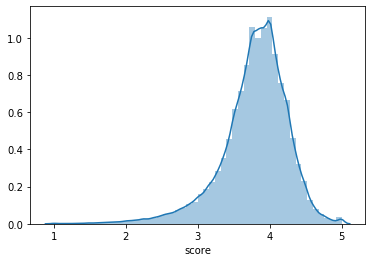

In [47]:
# Distribution of the mean score for each beer is mostly normal with a negative skewness
sns.distplot(text_no_nan.groupby(['beer_id']).score.mean())

## 210k beers have been reviewed in the subset of 'text_reviews': no empty text, but NaN attributes (2.99 million reviews)

## 137k beers have been reviewed in the subset 'text_no_nan': no empty text, no NaN attribute (2.8 million reviews)

In [30]:
(text_no_nan.beer_id.value_counts() > 49).sum()

8928

In [31]:
(text_no_nan.beer_id.value_counts() > 9).sum()

31310

 Only ~9k beers have 50+ reviews, 31k with 10+.

### BeerAdvocate users 10+ as a metric before assigning a beer scores based on their own algorithm, so this is the cutoff I will use as well

In [16]:
len(text_no_nan.username.unique())

81629

In [32]:
len(text_no_nan.beer_id.unique())

136535

In [37]:
text_no_nan['text'].sample()

1606246       Served in a traditional Paulaner Weizen Glass, this beer was a cloudy lemon yellow, and topped by a rather modest (for a weizen) slightly off-white head. However, it displayed good retention and a decent lacing. Aroma was more banana than clove, and was very fresh. The flavor has a nice crispness to it, with more banana flavors. Mouthfeel was rather smooth, yet fully carbonated. Drinkability was very good, as I had 60 ounces in a short period of time. I actually expected this to be the pils, since there was absolutely nothing else worthwhile on tap. Nice surprise when a hefe showed up, and a good one at that.  
Name: text, dtype: object

In [40]:
text_no_nan.iloc[1606247,:]

beer_id     34069                                                                                                                                                                                                                                                                                                                                                                                                                                                               
username    avalon07                                                                                                                                                                                                                                                                                                                                                                                                                                                            
date        2008-12-16                                                

In [41]:
text_no_nan

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of 360. Served in a DFH snifter, the beer pours dark brown/black with about an inch tan head that stuck around a little while. There's also a good amount of lacing. I like the aroma, the brew smells like dark fruit (raisin, plum), chocolate, roasted malt, and a bit of licorice. For the most part I think the taste is just like the aroma, but with some coffee flavor noticeable too. Mouthfeel/body is medium/full, it's creamy and coating with a moderate amount of carbonation. I think it's a good overall brew, worth picking up if you want a nice straight forward imperial stout. Here's hoping Four String brings this back in the future! $9.99 a bottle.",4.00,4.00,4.00,4.25,4.00,4.03
3,125646,GratefulBeerGuy,2017-12-20,"0% 16 oz can. Funny story: As I finally walked in the doors after a 45 min wait in line and freezing temps the sweet sound of the Grateful Dead's Sugar Magnolia greeted me from the TreeHouse sound system. The bottom of the can reads: ""Going where the wind goes, bloomin' like a red rose"" A white haze to the yellow and golden liquid. Thick and healthy, totally unfiltered. Brawny white foam cap, thick, all-white clumps. Huge lacing left over. The aroma has a very zesty citrus hop effect, mellon and mango, grainy earthiness, tropical fruit blend with a bitter to sweet effect, then a peppery kick at the end. Very aromatic. The flavor is just bursting with complex hops, zesty earthy tones, sweet orange, peppery malt, clean fresh feel and overall vibe. A crispy bite wakes you up, full and lush mouthfeel follows from a totally unfiltered expereince. The feel and flavor finishes with a fun, earthy, zesty dry bite. Tropical juicy, zesty citrus, zippy golden wheat malt, melons, rustic earthiness sums up the taste pretty well. Levels of complexity are deep. It's an interesting ride for sure. Overall, this one stands somewhere near the top of the New England IPA's.",4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouquet. Strong flavor but smoother than 8.2%. Maybe peach nose but overall a general citrus punch.,4.25,4.50,4.25,4.25,4.25,4.31
7,125646,MFMB,2017-12-16,"Pours a creamy opaque light straw yellow with a whispy frothy white head. Nose is of citrus skin and light pine. Taste is a thing of beauty! A nice citrus punch in the mouth. Both peeland zest as well as juice of oranges, grapefruit and lemon. Nice malt backbone although minimal presence, you know its there because the hoppyness of this beer is perfectly balanced. Meadium creamy body. Smooth to drink. Finishes with with a Nice pungent citrus bitterness that leaves you craving the next sip to start the process over again. By far my favorite Treehouse brew of the 4 or 5 I’ve had.",4.75,4.50,4.50,4.50,4.50,4.52
13,125646,jngrizzaffi,2017-12-10,"Pours a cloudy yellow color with a thin foamy head. Head retention is good. Lacing is very good. Has a big juicy citrus aroma. Nice juicy taste with a good amount of citrus and some piney resin at the end. Bitterness is spot on. A little on the heavy side, but excellent. Medium bodied with moderate carbonation.",4.50,4.50,4.50,4.75,4.50,4.53
...,...,...,...,...,...,...,...,...,...,...
9073095,58482,smcolw,2009-08-22,"Large chalky white head. Leaves lots of spotty lace. Foamy. Slightly hazy in an otherwise amber broth. Sweet, almost like maple syrup, smell. Lots of sugar and candy with a faint amount of Belgian yeast in the background. More dry than the smell indicates. Quite chewy. Very short aftertaste. Low level of hop bitterness. Still, it works in terms of balance. The swallow shows up a higher alcohol level than the ABV would indicate. In a word, I'd describe this beer as enigmatic.",4.00,3.50,3.50,4.00,3.50,3.58
9073096,58482,firkinhophead,2009-08-21,"pours a hazy, almost cloudy, autumn gold. Apparently unfiltered. Rich, off-white head set

In [35]:
pd.set_option('display.max_colwidth', -1)

In [33]:
text_no_nan.beer_id.value_counts()

11757     4168
2093      4159
7971      4029
1093      3963
412       3921
          ... 
76220        1
99447        1
128121       1
96694        1
97947        1
Name: beer_id, Length: 136535, dtype: int64

In [48]:
# Just looking at the top reviewed beers - this one happens to be a personal favorite!
beers.loc[beers['id'] == 412]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
25637,412,Old Rasputin,112,CA,US,Russian Imperial Stout,Year-round,9.0,Produced in the tradition of 18th Century Engl...,f


In [57]:
text_no_nan.loc[text_no_nan['beer_id'] == 412].score.mean()

4.280094363682734

In [61]:
text_no_nan.loc[text_no_nan['beer_id'] == 1093].score.mean()

4.262929598788797

In [64]:
# some beers have a 5.0 overall rating?
text_no_nan.groupby(['beer_id']).mean().max()

look       5.0
smell      5.0
taste      5.0
feel       5.0
overall    5.0
score      5.0
dtype: float64

In [75]:
(reviews[reviews.smell.isna() == True].index == reviews[reviews.overall.isna() == True].index).sum()

3790018

In [76]:
reviews.loc[(reviews['text'] == '') & (reviews.smell.isna() == True)]

,beer_id,username,date,text,look,smell,taste,feel,overall,score
57,235178,Bryan12345,2016-06-12,,NaN,NaN,NaN,NaN,NaN,4.25
70,104824,Reagan1984,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.50
71,104824,Chibeerguy1,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.75
72,104824,AaronBurr,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.00
74,104824,dfhhead25,2014-05-24,,NaN,NaN,NaN,NaN,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


-----

In [5]:
breweries.loc[breweries.id == 1199]

,id,name,city,state,country,notes,types
34812,1199,Founders Brewing Company,Grand Rapids,MI,US,Mahou San Miguel has a 30% ownership stake sin...,"Brewery, Bar, Eatery, Beer-to-go"


In [6]:
# There are foreign breweries in the dataset - should I keep them?
breweries.loc[breweries.country == 'DE']

,id,name,city,state,country,notes,types
83,33078,Brauhaus Alter Elbehof,Torgau,NaN,DE,No notes at this time.,"Brewery, Bar, Eatery"
89,18049,Landhaus - Krähennest,Löf - Mosel,NaN,DE,No notes at this time.,"Bar, Eatery, Beer-to-go"
129,6200,Maxl Bräu,Neu-Ulm,NaN,DE,No notes at this time.,Brewery
146,46383,Munich Brew Mafia,München,NaN,DE,No notes at this time.,Brewery
147,6696,Adler Brauerei und Brennerei Gebhard Föhr,Ehingen,NaN,DE,No notes at this time.,Brewery
...,...,...,...,...,...,...,...
50208,5819,Brauerei Goss,Deuerling,NaN,DE,No notes at this time.,"Brewery, Bar, Beer-to-go"
50255,6669,Demmert Bräu,Neuendorf Altmark,NaN,DE,No notes at this time.,Brewery
50283,7706,Bolten Brauerei,Korschenbroich,NaN,DE,No notes at this time.,Brewery
50295,7602,Brauerei Rechenberg,Rechenberg-Bienenmühle,NaN,DE,No notes at this time.,Brewery


In [59]:
breweries.notes.unique()

array(['No notes at this time.',
       'Duplicate of https://www.beeradvocate.com/beer/profile/36929',
       'At Modist, we push past traditional brewing by embracing creativity and unconstrained experimentation. ',
       ...,
       'Pacific Rim is closed: http://beeradvocate.com/beer/profile/931 ',
       'Big gourmet market, with a beer store and a beer bar in the basement.',
       'Located on the Ground Floor of Oxford House in TaiKoo Place.'],
      dtype=object)

In [7]:
# There are 58 breweries that don't have a listed city
breweries.city.isna().sum()

58

In [8]:
breweries.loc[breweries.city.isna()]

,id,name,city,state,country,notes,types
559,5616,Hops! La Fabbrica della Birra,NaN,NaN,IT,No notes at this time.,Brewery
712,1552,Big Buck Brewery & Steakhouse,NaN,NaN,US,No notes at this time.,Brewery
1370,839,Tooheys Brewing,NaN,NaN,AU,No notes at this time.,Brewery
2097,915,New Zealand Breweries Limited,NaN,NaN,NZ,No notes at this time.,Brewery
2882,23973,Sebago Brewing Company,NaN,NaN,US,No notes at this time.,Brewery
2886,1802,Weeping Radish Brewery & Bavarian Restaurant,NaN,NaN,US,No notes at this time.,Brewery
4843,3629,Frog Pubs,NaN,NaN,FR,No notes at this time.,Brewery
6830,34937,3er Tiempo Tienda De Cervezas,NaN,NaN,ES,No notes at this time.,Store
6833,1553,Shipyard Brewing Co.,NaN,NaN,US,No notes at this time.,Brewery
7625,2357,Tinkoff Brewery,NaN,NaN,RU,No notes at this time.,Brewery


# BEERS

In [6]:
# A lot of IPAs! To be expected
beers['style'].value_counts()[:50]

American IPA                                   44719
American Pale Ale (APA)                        22159
American Imperial IPA                          18338
Belgian Saison                                 18167
American Wild Ale                              12972
American Imperial Stout                        11180
American Porter                                10168
American Amber / Red Ale                        9748
American Stout                                  9103
Fruit and Field Beer                            7729
American Blonde Ale                             7089
American Brown Ale                              7008
German Hefeweizen                               6020
Belgian Witbier                                 5613
American Pale Wheat Ale                         5266
Berliner Weisse                                 5036
German Pilsner                                  4748
Belgian Pale Ale                                4523
Russian Imperial Stout                        

Index(['American IPA', 'American Pale Ale (APA)', 'American Imperial IPA',
       'Belgian Saison', 'American Wild Ale', 'American Imperial Stout',
       'American Porter', 'American Amber / Red Ale', 'American Stout',
       'Fruit and Field Beer',
       ...
       'American Brut IPA', 'Belgian Lambic', 'German Eisbock',
       'Robust Porter', 'Japanese Rice Lager', 'Japanese Happoshu',
       'Finnish Sahti', 'Bière de Champagne / Bière Brut', 'Belgian Faro',
       'Wild/Sour Beers'],
      dtype='object', length=112)

In [40]:
labels = beers['style'].value_counts()[:10].index

In [1]:
ax = sns.barplot(x=beers['style'].value_counts()[:10].index, y=beers['style'].value_counts()[:10], hue=beers['style'].value_counts()[:10].index, hue_order = labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
# ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

NameError: name 'sns' is not defined

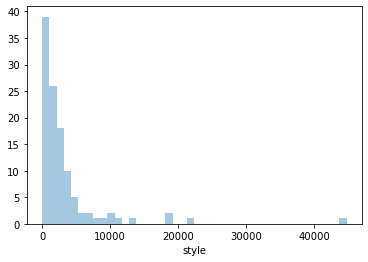

In [19]:
sns.distplot(beers['style'].value_counts(),kde=False)

In [79]:
beers['availability'].value_counts()

 Rotating                  98776
 Limited (brewed once)     72047
 Year-round                56800
Rotating                   48002
Limited (brewed once)      34798
Year-round                 19744
 Winter                     6427
 Fall                       5908
 Summer                     5136
 Spring                     3349
Fall                        2310
Winter                      2293
Summer                      1973
Spring                      1286
 Limited (brewed once)         9
 Rotating                      6
 Year-round                    4
 Fall                          3
 Winter                        1
 Summer                        1
Name: availability, dtype: int64

In [83]:
(beers['availability'] == ' Rotating').sum()

98776

In [84]:
(beers['availability'] == 'Rotating').sum()

48002

In [122]:
beers['availability'] = beers['availability'].replace(' Rotating', 'Rotating')
beers['availability'] = beers['availability'].replace(' Rotating ', 'Rotating')
beers['availability'] = beers['availability'].replace(' Limited (brewed once)', 'Limited (brewed once)')
beers['availability'] = beers['availability'].replace(' Limited (brewed once) ', 'Limited (brewed once)')
beers['availability'] = beers['availability'].replace(' Year-round', 'Year-round')
beers['availability'] = beers['availability'].replace(' Year-round ', 'Year-round')
beers['availability'] = beers['availability'].replace(' Winter', 'Winter')
beers['availability'] = beers['availability'].replace(' Winter ', 'Winter')
beers['availability'] = beers['availability'].replace(' Fall', 'Fall')
beers['availability'] = beers['availability'].replace(' Fall ', 'Fall')
beers['availability'] = beers['availability'].replace(' Summer', 'Summer')
beers['availability'] = beers['availability'].replace(' Summer ', 'Summer')
beers['availability'] = beers['availability'].replace(' Spring', 'Spring')
beers['availability'] = beers['availability'].replace(' Spring ', 'Spring')

In [123]:
# Not sure if having the availability play into the recommendations or not. Since most are
# 'rotating', which is incredibly vague.
beers['availability'].value_counts()

Rotating                 146784
Limited (brewed once)    106854
Year-round                76548
Winter                     8721
Fall                       8221
Summer                     7110
Spring                     4635
Name: availability, dtype: int64

In [131]:
beers.loc[(beers['country'] == 'US') | (beers['country'] == 'CA')]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,availbility
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,Rotating
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,Year-round
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,Winter
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,Rotating
6,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f,Year-round
...,...,...,...,...,...,...,...,...,...,...,...
358867,146613,American Pale Ale,36926,WI,US,American Pale Ale (APA),Rotating,NaN,No notes at this time.,t,Rotating
358868,267703,Collective Project: Gose,32763,ON,CA,Leipzig Gose,Limited (brewed once),5.0,Our Gose is an unfiltered wheat beer made with...,t,Limited (brewed once)
358870,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f,Rotating
358871,283124,Rumble Fish,29238,MI,US,American Imperial IPA,Rotating,8.3,No notes at this time.,f,Rotating


### 118k are retired beers

In [132]:
beers['retired'].value_counts()

f    240480
t    118393
Name: retired, dtype: int64

In [34]:
# subset to only non-retired beers
current_beer = beers[beers['retired'] == 'f']

In [35]:
current_beer.sample(20)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
154246,302218,Oakd,44537,OH,US,German Märzen / Oktoberfest,Fall,5.7,No notes at this time.,f
34442,206157,Santa's Schwarts,25844,NY,US,American Porter,Rotating,5.4,No notes at this time.,f
265271,123322,Tashka Double IPA,33392,AL,US,American Imperial IPA,Year-round,8.6,No notes at this time.,f
347826,221096,Hot Moz IPA,14430,PA,US,American IPA,Rotating,6.8,No notes at this time.,f
167561,288400,Okay Alright,41462,WI,US,American Pale Wheat Ale,Summer,5.0,No notes at this time.,f
323227,311592,Motherboy IPA,44793,KY,US,American IPA,Rotating,NaN,No notes at this time.,f
129824,350589,Double Dry Hopped Coastal Evacuation,25890,NJ,US,American Imperial IPA,Limited (brewed once),8.0,"Double dry-hopped with Galaxy and Mosaic, DDH ...",f
5787,228186,Happy Accident,42081,PA,US,American Wild Ale,Rotating,5.8,Apricot and stone fruit aromas with complex es...,f
115409,285757,"Sleepy Bear W/ Cacao Nibs, Vanilla & Raspberries",36002,IL,US,Russian Imperial Stout,Rotating,9.6,No notes at this time.,f
255500,208140,Appaloosa IPA,43252,OR,US,American IPA,Rotating,6.2,No notes at this time.,f


### Join non-retired beers df to our current list of reviews (text_no_nan)

In [36]:
text_no_nan.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
13,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53


In [37]:
text_no_nan = text_no_nan.rename(columns={'beer_id':'id'})
reviews_beer = pd.merge(text_no_nan, current_beer,
                        left_on = 'id',
                        right_on = 'id')

There are 22,514 beers with 10+ reviews

In [46]:
(reviews_beer.id.value_counts() > 1).sum()

69749

In [48]:
# group by beer_id ('id') and take the mean of all reviews for that beer
ratings = pd.DataFrame(reviews_beer.groupby('id')['score'].mean())
ratings.head()

,score
id,
5,3.389863
6,3.643678
7,3.235484
9,3.087823
10,3.797290


In [60]:
# add a column tallying the # of reviews for each beer, rename score, and subset out 
# reviews with 9 or less total reviews
ratings['no_of_ratings'] = reviews_beer.groupby('id')['score'].count()
ratings = ratings.rename(columns={'score':'avg_score'})
ratings = ratings.loc[ratings['no_of_ratings'] > 9]

In [62]:
ratings.sample(5)

,avg_score,no_of_ratings
id,,
9508,3.265405,37
5537,3.691977,86
91126,3.941176,17
66920,3.846000,20
71800,3.109167,12


In [57]:
# rejoin the engineered features onto the original review_beer df
df = reviews_beer.merge(ratings, how='inner', on='id')
df.shape

(2265731, 21)

In [63]:
# now going to look at average score and number of reviews for each USER, then subset
# to those with 5+ reviews
reviewers = pd.DataFrame(df.groupby('username')['id'].count())
reviewers['avg_usr_score'] = df.groupby('username')['score'].mean()
reviewers = reviewers.loc[reviewers['id'] > 4]

In [64]:
reviewers.head()

,id,avg_usr_score
username,,
--Dom--,45,4.293778
--weezl--,5,4.070000
-DF-,6,3.896667
-Hoptimus_Prime-,5,3.670000
-MK-,8,4.296250


In [65]:
# renaming ID to tot_usr_rvw
reviewers = reviewers.rename(columns={'id':'tot_usr_rvw'})

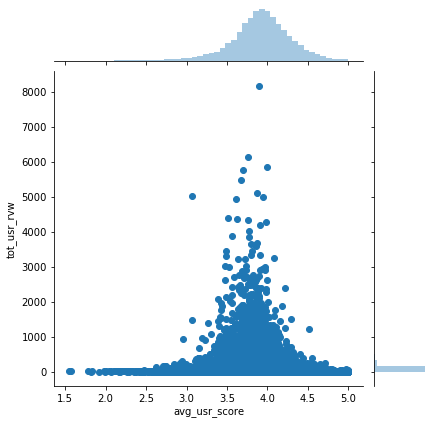

In [66]:
# visualize the distribution of users and their # of reviews and average score given
sns.jointplot(x='avg_usr_score', y='tot_usr_rvw', data = reviewers)

In [67]:
# there are 26k unique users
reviewers.shape

(26376, 2)

In [75]:
reviewer_std = reviewers['avg_usr_score'].std()
reviewer_mean = reviewers['avg_usr_score'].mean()
print(reviewer_mean + (reviewer_std*2))
print(reviewer_mean - (reviewer_std*2))

4.668145351321007
3.173760941274998


In [74]:
# removing users outside of 2STD of the mean average score
# the thought is that some reviewers might be too generous, or too harsh in general
# Cutting out 2std above the mean makes sense as someone with an average score of 4.7+
# is either only drinking the best, or their view is skewed.
# To maintain consistency I also removed 2STD below, but it could be argued that the 
# lowerbound of the cutoff should be lower

reviewers_sub = reviewers.loc[(reviewers['avg_usr_score'] >= 3.182) &\
                              (reviewers['avg_usr_score'] <= 4.665)]

In [73]:
# Lose 1400 users
reviewers_sub.shape

(24901, 2)

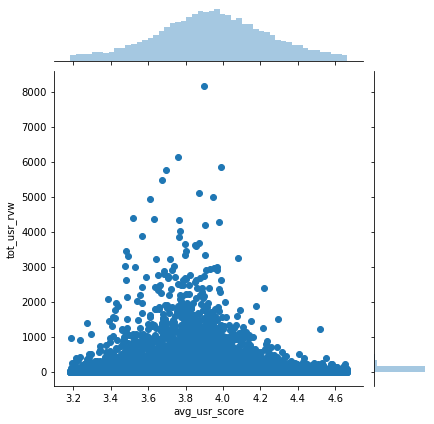

In [71]:
sns.jointplot(x='avg_usr_score', y='tot_usr_rvw', data = reviewers_sub)

In [76]:
df_with_mins = df.merge(reviewers_sub, how = 'inner', on = 'username')

In [77]:
df_with_mins.shape

(2144276, 23)

My work continues in the 1.0 Recommender Jupyter Notebook